# AirNow Interpolation Process Test 01

In [16]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd
import arcpy
import numpy
import os
import requests
import datetime

In [17]:
gis = GIS("https://esrifederal.maps.arcgis.com", username="Anieto_esrifederal")

Enter password: ········


### Retrieve Data

Sample AirNow REST Request: https://www.airnowapi.org/airnowsitedata_2019030104?API_KEY=E7481512-D56F-E511-A1314CE18CD4A2B0

In [21]:
now = datetime.datetime.now()
now

datetime.datetime(2019, 5, 8, 10, 53, 22, 575804)

In [5]:
date_string = "2019050104"
api_key = "E7481512-D56F-E511-A1314CE18CD4A2B0"
url = "https://www.airnowapi.org/airnowsitedata_{0}?API_KEY={1}".format(date_string, api_key)

In [6]:
airnow_df = pd.read_csv(url)
airnow_df.head()

,AQSID,SiteName,Status,EPARegion,Latitude,Longitude,Elevation,GMTOffset,CountryCode,StateName,...,OZONE,OZONE_Unit,NO2,NO2_Unit,CO,CO_Unit,SO2,SO2_Unit,PM10,PM10_Unit
0,483951076,Franklin Oak Grove,Active,R6,31.168889,-96.481944,136.9,0.0,US,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,080699991,Rocky Mtn NP Collocated,Active,R3,40.277800,-105.545300,2744.7,0.0,US,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,530639995,Colbert-Greenbluff,Active,R10,47.808226,-117.343270,577.4,-8.0,US,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,530639997,Spokane-E Broadway Ave (US),Active,R10,47.663963,-117.257652,611.2,-8.0,US,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,530639996,Liberty Lake-E Valeyway (US),Inactive,R10,47.660568,-117.084503,650.3,-8.0,US,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
airnow_df.plot(x="Longitude", y="Latitude", kind="scatter")

### Clean Data

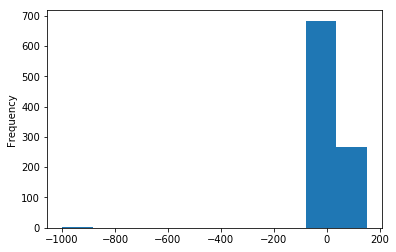

In [8]:
airnow_df['PM25_AQI'].plot(kind='hist')

In [9]:
print("Pre-query record count: {0}".format(airnow_df.shape[0]))
airnow_df = airnow_df.query("PM25_AQI > -999")
print("Post-query record count: {0}".format(airnow_df.shape[0]))

Pre-query record count: 2814
Post-query record count: 949


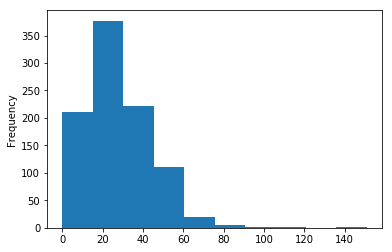

In [10]:
airnow_df['PM25_AQI'].plot(kind='hist')

In [11]:
airnow_sdf = pd.DataFrame.spatial.from_xy(df=airnow_df, x_column="Longitude", y_column="Latitude", sr=4326)
airnow_sdf.head()

,AQSID,SiteName,Status,EPARegion,Latitude,Longitude,Elevation,GMTOffset,CountryCode,StateName,...,OZONE_Unit,NO2,NO2_Unit,CO,CO_Unit,SO2,SO2_Unit,PM10,PM10_Unit,SHAPE
2,530639995,Colbert-Greenbluff,Active,R10,47.808226,-117.343270,577.4,-8.0,US,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -117.34326999999999, ""y"": 47.808226, ""sp..."
3,530639997,Spokane-E Broadway Ave (US),Active,R10,47.663963,-117.257652,611.2,-8.0,US,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -117.25765200000001, ""y"": 47.663963, ""sp..."
10,390610048,Cincinnati Near Road,Active,R5,39.146025,-84.538375,0.0,-5.0,US,OH,...,NaN,16.0,PPB,0.73,PPM,NaN,NaN,NaN,NaN,"{""x"": -84.538375, ""y"": 39.146025, ""spatialRefe..."
14,390610040,Taft,Active,R5,39.128860,-84.504040,0.0,-5.0,US,OH,...,PPB,17.0,PPB,0.24,PPM,1.0,PPB,30.0,UG/M3,"{""x"": -84.50404, ""y"": 39.128859999999996, ""spa..."
16,390990014,Youngstown - Head Start,Active,R5,41.095938,-80.658467,0.0,-5.0,US,OH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -80.658467, ""y"": 41.095938000000004, ""sp..."


In [12]:
airnow_sdf.shape

(949, 35)

In [13]:
airnow_sdf['SHAPE']

2       {"x": -117.34326999999999, "y": 47.808226, "sp...
3       {"x": -117.25765200000001, "y": 47.663963, "sp...
10      {"x": -84.538375, "y": 39.146025, "spatialRefe...
14      {"x": -84.50404, "y": 39.128859999999996, "spa...
16      {"x": -80.658467, "y": 41.095938000000004, "sp...
19      {"x": -118.13068899999999, "y": 34.669589, "sp...
28      {"x": -123.34846599999999, "y": 42.434149, "sp...
29      {"x": -118.22675500000001, "y": 34.066429, "sp...
32      {"x": -118.14778000000001, "y": 35.05045, "spa...
35      {"x": -119.06261299999998, "y": 35.35661500000...
40      {"x": -121.9617, "y": 38.3525, "spatialReferen...
41      {"x": -120.0341, "y": 36.9533, "spatialReferen...
43      {"x": -95.425, "y": 30.3503, "spatialReference...
48      {"x": -113.89299799999999, "y": 45.178699, "sp...
50      {"x": -89.3819, "y": 36.0528, "spatialReferenc...
51      {"x": -82.06208199999999, "y": 35.912487, "spa...
57      {"x": -85.2931, "y": 35.0508, "spatialReferenc...
58      {"x": 

In [14]:
if arcpy.Exists(r"/arcgis/home/anieto/workspace/AirNow.gdb"):
    print("Using existing file geodatabase...")
    airnow_fgdb = r"/arcgis/home/anieto/workspace/AirNow.gdb"
    
else:    
    print("Creating new file geodatabase...")
    airnow_fgdb = arcpy.CreateFileGDB_management(r"/arcgis/home/anieto/workspace", "AirNow").getOutput(0)

Creating new file geodatabase...


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000732: File GDB Location: Dataset /arcgis/home/anieto/workspace does not exist or is not supported
Failed to execute (CreateFileGDB).


In [76]:
airnow_fc = airnow_sdf.spatial.to_featureclass(location=os.path.join(airnow_fgdb, "AirNow_Test"))
airnow_fc

'/arcgis/home/anieto/workspace/AirNow.gdb/AirNow_Test'

In [77]:
airnow_layer = airnow_sdf.spatial.to_featurelayer("AirNow_Test_02", gis=gis)

In [78]:
airnow_layer

<Item title:"AirNow_Test_02" type:Feature Layer Collection owner:anieto>

<Item title:"USA States (Generalized)" type:Feature Layer Collection owner:esri_livingatlas>
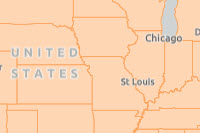

In [79]:
# Item Added From Toolbar
# Title: USA States (Generalized) | Type: Feature Service | Owner: esri_livingatlas
states = gis.content.get("99fd67933e754a1181cc755146be21ca")
states

In [80]:
airnow_map = gis.map("usa")
airnow_map.add_layer(airnow_layer)
airnow_map

MapView(layout=Layout(height='400px', width='100%'))

In [81]:
from arcgis import features
inter = features.analyze_patterns.interpolate_points(airnow_layer, "PM25_AQI", bounding_polygon_layer=states)
inter

{'result_layer': <FeatureCollection>,
 'prediction_error': <FeatureCollection>,
 'predicted_point_layer': <FeatureCollection>}

In [84]:
airnow_map.add_layer(inter['result_layer'])

In [83]:
airnow_map.legend = True

#### >>> Dev Zone: Bug on Spatially-enabled Dataframe Plotting <<<

In [25]:
usa_map = gis.map("usa")
usa_map

MapView(layout=Layout(height='400px', width='100%'))

In [26]:
airnow_sdf.spatial.plot(usa_map)

True

#### >>> End Dev Zone: Bug on Spatially-enabled Dataframe Plotting <<<